<a href="https://colab.research.google.com/github/YoTaSo/datascience/blob/main/rl/policy_value_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import matplotlib

#matplotlib.use("TkAgg")
import gym
import gridworld
from gym import wrappers, logger
import numpy as np
import copy

In [ ]:

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/RLD/TME2'
os.chdir(root_path)

In [ ]:
#policy iteration class
class PolicyIterAgent(object):

  def __init__ (self,env,gamma=1,eps=0.0001):
      self.action_space = env.action_space
      self.gamma=gamma
      self.eps=eps
      self.statedic, self.mdp = env.getMDP()
      self.policyIndx=0
      #initialize policy
      #self.winstate=list(env.states.keys())[5]
      #self.losestate=list(env.states.keys())[1]
      #terminals=list(set(env.states.keys()).difference(set(self.mdp.keys())))
      self.policy={}
      for s in self.mdp:
        self.policy[s]=self.action_space.sample()

  def policyEval(self,pol):

    #initilize
    V0={}
    V1={}
    for s in self.statedic:
      '''
      if s==self.winstate:
        V0[s]=1
        V1[s]=1
      elif s==self.losestate:
        V0[s]=-1
        V1[s]=-1
      else:
      '''
      V0[s]=0
      V1[s]=0


    while True:
      for s1 in self.mdp:
        V1[s1]=np.sum([t[0]*(t[2]+self.gamma*V0[s1]) for t in self.mdp[s1][pol[s1]]])
      if np.linalg.norm(np.subtract(list(V0.values()),list(V1.values())))<self.eps:
        break
      V0=V1
    return V1

  def nextPolicy(self):
    self.policyIndx+=1
    for s1 in self.mdp:
      
      Vpi=self.policyEval(self.policy)
      ll=[]
      for a in range(self.action_space.n):
        ll.append(np.sum([t[0]*(t[2]+self.gamma*Vpi[t[1]]) for t in self.mdp[s1][a]]))
      #print(ll)
      ind=np.arange(0,len(ll))
      u=np.random.rand(1)[0]
      # a liitle exploration not to find sous optimal
      if u>0.1:
        self.policy[s1]=np.argmax(ll)
      else:
        self.policy[s1]=self.action_space.sample()
        '''
      if sum(ll==max(ll))>1:
        ind2=ind[ll==max(ll)]
        self.policy[s1]=np.random.choice(ind2,1)[0]
      else:
        self.policy[s1]=np.argmax(ll)
        '''


  def act(self, observation):#, reward, done):
    obs=str(observation.tolist())
    action=self.policy[obs]
    return action#self.action_space.sample()

In [ ]:
#value iteration class
class ValueIterAgent(object):

  def __init__ (self,env,gamma=1,eps=0.0001):
      self.action_space = env.action_space
      self.gamma=gamma
      self.eps=eps
      self.statedic, self.mdp = env.getMDP()
      self.valueIndx=0
      #initialize policy
      #self.winstate=list(env.states.keys())[5]
      #self.losestate=list(env.states.keys())[1]
      self.isConverged=False
      self.policy={}

      for s in self.mdp:
        self.policy[s]=self.action_space.sample()
      
      #initilize
      self.Val={}
      for s in self.statedic:
        '''
        if s==self.winstate:
          self.Val[s]=1
        elif s==self.losestate:
          self.Val[s]=-1
        else:
          '''
        self.Val[s]=0
  def valueEval(self):
    for s1 in self.mdp:
      ll=[]
      for a in range(self.action_space.n):
        ll.append(np.sum([t[0]*(t[2]+self.gamma*self.Val[t[1]]) for t in self.mdp[s1][a]]))
      self.Val[s1]=max(ll)

  def nextPolicy(self):
    self.valueIndx+=1
    v1=list(self.Val.values())

    self.valueEval()
    for s1 in self.mdp:
      ll=[]
      for a in range(self.action_space.n):
        ll.append(np.sum([t[0]*(t[2]+self.gamma*self.Val[t[1]]) for t in self.mdp[s1][a]]))
      #print(ll)

      self.policy[s1]=np.argmax(ll)
    
    self.isConverged=np.linalg.norm(np.subtract(list(self.Val.values()),v1))<self.eps



  def act(self, observation):#, reward, done):
    obs=str(observation.tolist())
    action=self.policy[obs]
    return action#self.action_space.sample()

Discrete(4)
(array([[1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 3, 1],
       [1, 0, 1, 0, 5, 1],
       [1, 0, 0, 2, 0, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]]), 0, False, {})


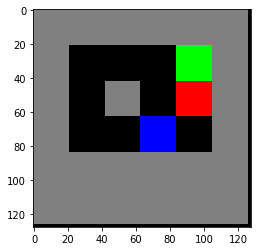

  (West)
      
      
      
      
      
      
Nombre d'etats :  11
[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
{0: [(0.8, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', 0, False), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', 0, False), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 2, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', 0, False)], 1: [(0.8, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 2, 1], [1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', -1, True), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 0, 2, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]', 0, False), (0.1, '[[1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 3, 1], [1, 0, 1, 0, 5, 1], [1, 0, 0, 2, 0, 1], [1, 

In [ ]:
env = gym.make("gridworld-v0")
env.seed(0)  # Initialise le seed du pseudo-random
print(env.action_space)  # Quelles sont les actions possibles
print(env.step(1))  # faire action 1 et retourne l'observation, le reward, et un done un booleen (jeu fini ou pas)
env.render()  # permet de visualiser la grille du jeu 
env.render(mode="human") #visualisation sur la console
statedic, mdp = env.getMDP()  # recupere le mdp : statedic
print("Nombre d'etats : ",len(statedic))  # nombre d'etats ,statedic : etat-> numero de l'etat
state, transitions = list(mdp.items())[0]
print(state)  # un etat du mdp
print(transitions)  # dictionnaire des transitions pour l'etat :  {action-> [proba,etat,reward,done]}


In [ ]:
# Execution avec un Agent
#agent = RandomAgent(env.action_space)

# Faire un fichier de log sur plusieurs scenarios
outdir = 'gridworld-v0/random-agent-results'
envm = wrappers.Monitor(env, directory=outdir, force=True)#, video_callable=False)

env.setPlan("gridworldPlans/plan2.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})
env.seed()  # Initialiser le pseudo aleatoire
episode_count = 1000
reward = 0
done = False
rsum = 0
FPS = 0.0001

In [ ]:
polIterAgent=PolicyIterAgent(env,gamma=.9,eps=1e-6)
valIterAgent=ValueIterAgent(env,gamma=0.5,eps=1e-8)

In [ ]:

rsumVec=[]
episode_count=100
for i in range(episode_count):
  obs=env.reset()
  #reward=0
  #done = False

  j = 0
  rsum = 0
  
  while True:
    #action = polIterAgent.act(obs)#, reward, done)
    action=valIterAgent.act(obs)
    obs, reward, done, _ = env.step(action)
    rsum += reward
    j += 1
    if done:
      print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
      #polIterAgent.nextPolicy()
      rsumVec.append(rsum)
      valIterAgent.nextPolicy()
      break
  
  #if valIterAgent.isConverged:
  #  break
    
print("done")
env.close()

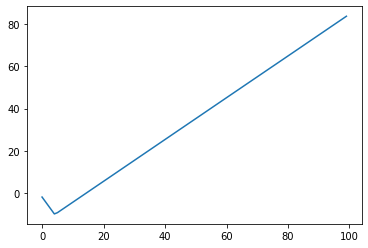

In [ ]:
plt.plot(np.cumsum(rsumVec))

In [ ]:
rsumvecpoliter=[]
episode_count=1000
for i in range(episode_count):
  obs=env.reset()
  #reward=0
  #done = False

  j = 0
  rsum = 0
  
  while True:
    action = polIterAgent.act(obs)#, reward, done)
    #action=valIterAgent.act(obs)
    obs, reward, done, _ = env.step(action)
    rsum += reward
    j += 1
    if done:
      print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
      polIterAgent.nextPolicy()
      rsumvecpoliter.append(rsum)
      #valIterAgent.nextPolicy()
      break
  
  #if valIterAgent.isConverged:
  #  break
    
print("done")
env.close()

Text(0, 0.5, 'Cumulative reward')

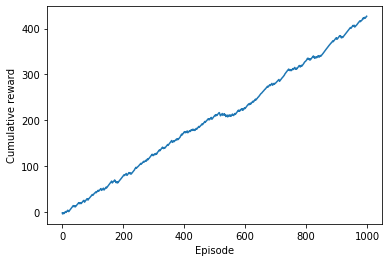

In [ ]:
plt.plot(np.cumsum(rsumvecpoliter))
#plt.ylim
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")